# Shape data

## Train my AlexNet

Don't run this if you are looking for visualization, it will overwrite the weights!

In [1]:
import os
import sys
import json
import torch
import torch.nn as nn
from torchvision import transforms, datasets, utils
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim
from tqdm import tqdm
import sys
sys.path.append("deep-learning-for-image-processing\pytorch_classification\Test2_alexnet") 
from model import AlexNet

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") 
print("using {} device.".format(device))

data_transforms = {
    "train": transforms.Compose([transforms.RandomResizedCrop(224),
                                 transforms.RandomHorizontalFlip(),
                                 transforms.ToTensor(),
                                 transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]),
    "val": transforms.Compose([transforms.Resize((224, 224)),  # cannot 224, must (224, 224)
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])}

using cuda:0 device.


In [3]:
data_root = os.path.abspath(os.path.join(os.getcwd(), "../.."))  # get data root path
# root = os.getcwd()
# data_root = os.path.join(root, "deep-learning-for-image-processing") # get data root path"))
image_path = os.path.join(data_root, "data_set", "shape_data2")  # flower data set path
assert os.path.exists(image_path), "{} path does not exist.".format(image_path)

train_dataset = datasets.ImageFolder(root=os.path.join(image_path, "train"),
                                     transform=data_transforms["train"])
train_num = len(train_dataset)

batch_size = 32
# num_workers = min([os.cpu_count(), batch_size if batch_size > 1 else 0, 8])  # number of workers 
num_workers = min([os.cpu_count(), batch_size if batch_size > 1 else 0, 1]) # jupyterlab allows one process only
print('Using {} dataloader workers every process'.format(num_workers))


train_loader = torch.utils.data.DataLoader(train_dataset,
                                           batch_size=batch_size, shuffle=True,
                                           num_workers=num_workers)

Using 1 dataloader workers every process


In [4]:
validate_dataset = datasets.ImageFolder(root=os.path.join(image_path, "val"),
                                        transform=data_transforms["val"])
val_num = len(validate_dataset)
validate_loader = torch.utils.data.DataLoader(validate_dataset,
                                              batch_size=4, shuffle=False,
                                              num_workers=num_workers)

print("using {} images for training, {} images for validation.".format(train_num,
                                                                       val_num))

using 3600 images for training, 400 images for validation.


In [5]:
# Write JSON for classes
flower_list = train_dataset.class_to_idx # {0: 'circle', 1: 'ellipse', 2: 'rectangle', 3: 'triangle'}
cla_dict = dict((val, key) for key, val in flower_list.items()) 

# write dict into json file
json_str = json.dumps(cla_dict, indent=4)
with open('shape2_class_indices.json', 'w') as json_file:
    json_file.write(json_str)

In [62]:
# train_dataset

In [8]:
net = AlexNet(num_classes=len(cla_dict), init_weights=True) # use JSON class dict to automate output feature
net.to(device)
loss_function = nn.CrossEntropyLoss()
# pata = list(net.parameters()) # to look at weights
optimizer = optim.Adam(net.parameters(), lr=0.0002)

epochs = 10
save_path = './Shape2AlexNet.pth'
best_acc = 0.0
train_steps = len(train_loader)

In [9]:
# for epoch in range(epochs):
#     # train mode
#     net.train()
#     running_loss = 0.0
#     train_bar = tqdm(train_loader, file=sys.stdout)
#     for step, data in enumerate(train_bar):
#         images, labels = data
#         optimizer.zero_grad()
#         outputs = net(images.to(device))
#         loss = loss_function(outputs, labels.to(device))
#         loss.backward()
#         optimizer.step()

#         # print statistics
#         running_loss += loss.item()

#         train_bar.desc = "train epoch[{}/{}] loss:{:.3f}\n".format(epoch + 1,
#                                                                  epochs,
#                                                                  loss)

#     # validate
#     net.eval()
#     acc = 0.0  # accumulate accurate number / epoch
#     with torch.no_grad():
#         val_bar = tqdm(validate_loader, file=sys.stdout)
#         for val_data in val_bar:
#             val_images, val_labels = val_data
#             outputs = net(val_images.to(device))
#             predict_y = torch.max(outputs, dim=1)[1]
#             acc += torch.eq(predict_y, val_labels.to(device)).sum().item()

#     val_accurate = acc / val_num
#     print('[epoch %d] train_loss: %.3f  val_accuracy: %.3f' %
#           (epoch + 1, running_loss / train_steps, val_accurate))

#     if val_accurate > best_acc:
#         best_acc = val_accurate
#         torch.save(net.state_dict(), save_path)

# print('Finished Training')

train epoch[1/10] loss:1.3870<?, ?it/s]
train epoch[1/10] loss:1.381:04<08:17,  4.44s/it]
train epoch[1/10] loss:1.381:04<01:47,  1.01it/s]
train epoch[1/10] loss:1.351:05<01:29,  1.21it/s]
train epoch[1/10] loss:1.373:05<01:16,  1.40it/s]
train epoch[1/10] loss:1.402:06<01:04,  1.63it/s]
train epoch[1/10] loss:1.426:06<00:57,  1.84it/s]
train epoch[1/10] loss:1.366:06<00:47,  2.20it/s]
train epoch[1/10] loss:1.3500:07<00:43,  2.35it/s]
train epoch[1/10] loss:1.3930:07<00:41,  2.46it/s]
train epoch[1/10] loss:1.4070:07<00:41,  2.44it/s]
train epoch[1/10] loss:1.3910:08<00:42,  2.34it/s]
train epoch[1/10] loss:1.3790:08<00:42,  2.31it/s]
train epoch[1/10] loss:1.3800:09<00:41,  2.35it/s]
train epoch[1/10] loss:1.4030:09<00:40,  2.38it/s]
train epoch[1/10] loss:1.3870:10<00:39,  2.43it/s]
train epoch[1/10] loss:1.3880:10<00:38,  2.50it/s]
train epoch[1/10] loss:1.3700:10<00:35,  2.66it/s]
train epoch[1/10] loss:1.3790:11<00:35,  2.59it/s]
train epoch[1/10] loss:1.3830:11<00:33,  2.72it/s

## Visualization
https://github.com/jacobgil/pytorch-grad-cam

### Functions

In [35]:
# Overlay Grad-CAM
def show_cam_on_image(img, mask):
    heatmap = cv2.applyColorMap(np.uint8(255 * mask), cv2.COLORMAP_JET)
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)
    heatmap = np.float32(heatmap) / 255
    cam = heatmap + np.float32(img)
    cam = cam / np.max(cam)
    return np.uint8(255 * cam)

def class_featuremap(input_tensor, model, target_layer, target_category, device, plot=True):
    # Define feature maps storage
    feature_maps = {}
    gradients = None  # Local variable

    # Define forward hook
    def forward_hook(module, input, output):
        # print("Forward hook triggered. Output shape:", output.shape)  # Debugging
        feature_maps['conv3'] = output

    # Define backward hook
    def backward_hook(module, grad_input, grad_output):
        nonlocal gradients  # Use nonlocal instead of global
        if grad_output[0] is not None:
            gradients = grad_output[0]
            # print(f"Gradients captured: {gradients.shape}")  # Debugging
        else:
            print("Grad_output[0] is None")  # Debugging

    # Register hooks
    forward_handle = target_layer.register_forward_hook(forward_hook)
    backward_handle = target_layer.register_backward_hook(backward_hook)

    # Ensure input tensor requires gradient
    input_tensor = input_tensor.to(device).requires_grad_(True)

    # Forward pass (model in eval mode)
    model.eval()  # Set model to evaluation mode
    output = model(input_tensor)

    # Compute loss and backward pass
    loss = output[0, target_category]  # Extract single scalar
    loss.backward()

    # Ensure feature map is captured
    assert 'conv3' in feature_maps, "Feature map not captured!"
    conv3_feature_maps = feature_maps['conv3']

    # Ensure gradients are captured
    assert gradients is not None, "Gradients not captured!"

    # Compute Grad-CAM
    alpha = gradients.mean(dim=(2, 3), keepdim=True)  # Compute importance weights
    grad_cam = (conv3_feature_maps * alpha).sum(dim=1, keepdim=True)  # Weighted sum
    grad_cam = torch.relu(grad_cam)  # Apply ReLU
    grad_cam = grad_cam / grad_cam.max()  # Normalize to [0, 1]

    # Convert to numpy
    grad_cam = grad_cam.squeeze().cpu().detach().numpy()

    # Convert input image to numpy
    rgb_img = input_tensor.squeeze().permute(1, 2, 0).cpu().detach().numpy()
    rgb_img = (rgb_img - rgb_img.min()) / (rgb_img.max() - rgb_img.min())

    # Resize Grad-CAM
    grad_cam_resized = cv2.resize(grad_cam, (rgb_img.shape[1], rgb_img.shape[0]))

    # Visualize
    if plot == True:
        visualization = show_cam_on_image(rgb_img, grad_cam_resized)
        plt.imshow(visualization)
        plt.axis('off')
        plt.show()

    # Remove hooks
    forward_handle.remove()
    backward_handle.remove()
    
    return rgb_img, grad_cam_resized

def visualize_classes(input_tensor, model, target_layer, device, class_dict, num_cols=3):
    num_plots = len(class_dict)  # num of activations
    num_rows = (num_plots + num_cols - 1) // num_cols  # row of display
    
    plt.figure(figsize=(num_cols, num_rows))
    for i in range(num_plots):
        target_category = i
        weighted_img, grad_cam = class_featuremap(input_tensor=input_tensor, 
                                                  model=model, 
                                                  target_layer=target_layer, 
                                                  device=device, 
                                                  target_category=target_category, 
                                                  plot=False)
        visualization = show_cam_on_image(weighted_img, grad_cam)
        
        plt.subplot(num_rows, num_cols, i+1)
        plt.title(class_dict[str(i)])
        plt.imshow(visualization)
        plt.axis('off')
    plt.tight_layout()
    plt.show()
    
def get_category(cla_dict, cls_name):
    reverse_dict = {value: key for key, value in cla_dict.items()}
    return reverse_dict[cls_name]

In [32]:
def img_to_tensor(img_path, data_transform):
    assert os.path.exists(img_path), "file: '{}' dose not exist.".format(img_path)
    img = Image.open(img_path)
    
    plt.imshow(img)
    val_image = img.convert("RGB")
    input_tensor = data_transform(val_image).unsqueeze(0) # [N, C, H, W]

    return input_tensor

def get_class_dict(json_path):
    assert os.path.exists(json_path), "file: '{}' dose not exist.".format(json_path)
    
    with open(json_path, "r") as f:
        class_dict = json.load(f)
    return class_dict

def predict_class(input_tensor, model, class_dict, device):
    model.to(device)
    model.eval()
    with torch.no_grad():
        # predict class
        output = torch.squeeze(model(input_tensor.to(device))).cpu()
        predict = torch.softmax(output, dim=0)
        predict_cls = torch.argmax(predict).numpy()

    print_res = "class: {}   prob: {:.3}".format(class_dict[str(predict_cls)],
                                                 predict[predict_cls].numpy())
    for i in range(len(predict)):
        print("class: {:10}   prob: {:.3}".format(class_dict[str(i)],
                                                  predict[i].numpy()))
    classes = list(class_dict.values())
    probabilities = predict

    plt.figure(figsize=(4, 3))
    plt.bar(classes, probabilities, color='gray')

    plt.title(print_res)
    plt.xlabel('Classes', fontsize=14)
    plt.ylabel('Probabilities', fontsize=14)

    for i, prob in enumerate(probabilities):
        plt.text(i, prob + 0.01, f'{prob:.4f}', ha='center', va='bottom', size = 6)
    plt.show()
    
    
def visualize_all(img_path, model, device, target_layers, class_dict, data_transform,
                  predict_on=True, 
                  visualize_classes_on=True):
    input_tensor = img_to_tensor(img_path, data_transform)
    predict_class(input_tensor, model, class_dict, device)
    
    for target_layer in target_layers:
        print(target_layer)
        visualize_classes(input_tensor, model, target_layer, device, class_dict, num_cols=len(class_dict))

### General preparations
* Load models
* define transformations
* target_layers to visualize

In [60]:
from PIL import Image
data_transform = transforms.Compose(
        [transforms.Resize((224, 224)),
         transforms.ToTensor(),
         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [60]:
json_path = './shape2_class_indices.json'
class_dict = get_class_dict(json_path)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = AlexNet(num_classes=len(class_dict)).to(device)
# load model weights
weights_path = "./Shape2AlexNet.pth"
assert os.path.exists(weights_path), "file: '{}' dose not exist.".format(weights_path)
model.load_state_dict(torch.load(weights_path))

<All keys matched successfully>

In [62]:
target_layers =  [model.features[0],
                 model.features[6],
                 model.features[10]]

### An ellipse that is predicted as rectangle

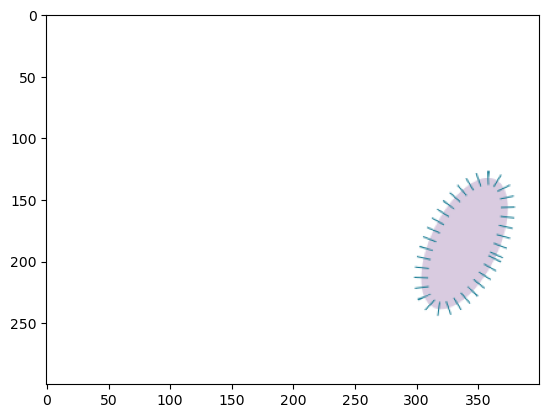

In [65]:
img_path = '/common/vanderplas/muxin/Models/data_set/shape_data2/val/ellipse/ellipse133.png'
input_tensor = img_to_tensor(img_path, data_transform,)

class: circle       prob: 0.224
class: ellipse      prob: 0.269
class: rectangle    prob: 0.313
class: triangle     prob: 0.194


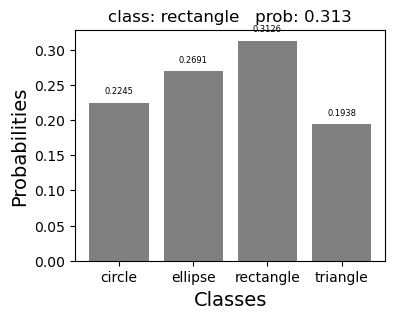

In [28]:
predict_class(input_tensor=input_tensor,
             model=model,
             class_dict=class_dict,
              device = device)

class: circle       prob: 0.224
class: ellipse      prob: 0.269
class: rectangle    prob: 0.313
class: triangle     prob: 0.194


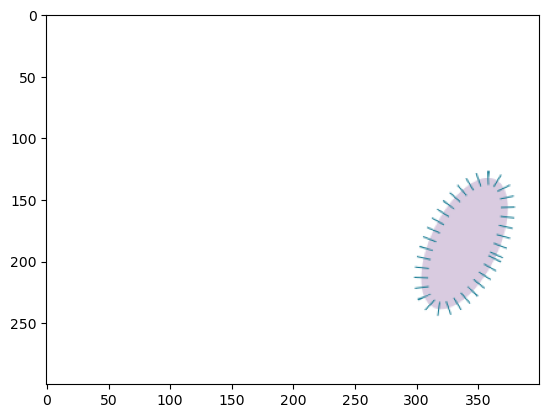

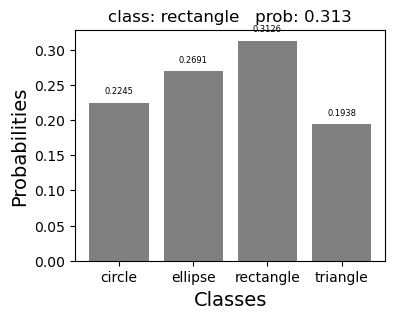

Conv2d(3, 48, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))


/common/vanderplas/muxin/38env/lib/python3.8/site-packages/torch/nn/modules/module.py:1025: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


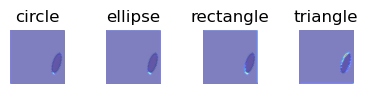

Conv2d(128, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


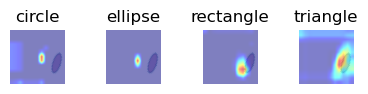

Conv2d(192, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


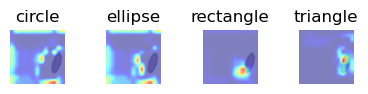

In [31]:
visualize_all(img_path, model, device, target_layers, class_dict, data_transform)

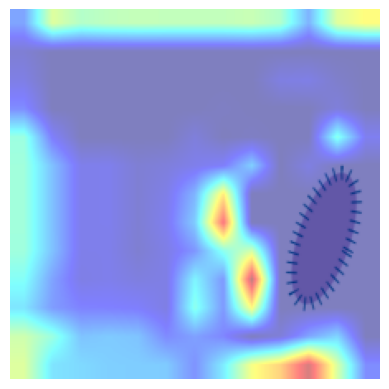

In [66]:
target_layer = target_layers[2]
weighted_img, grad_cam = class_featuremap(input_tensor=input_tensor, 
                  model=model, 
                  target_layer=target_layer, 
                  device=device, 
                  target_category=get_category(cla_dict, "ellipse"), 
                  plot=True)

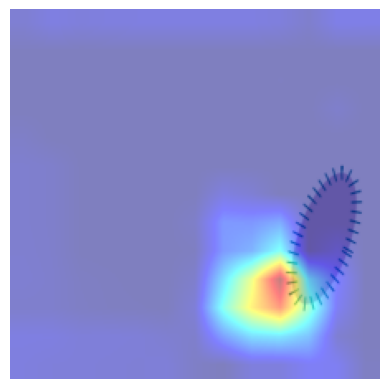

In [67]:
target_layer = target_layers[2]
weighted_img, grad_cam = class_featuremap(input_tensor=input_tensor, 
                  model=model, 
                  target_layer=target_layer, 
                  device=device, 
                  target_category=get_category(cla_dict, "rectangle"), 
                  plot=True)

The highlighted regions stands for higher weights, which is higher contribution to determining the classes. It is interesting to see how these highlights becomes off to ellipse after first feature extraction. Even though the feature extraction is not ideal for ellipse, it was predicted as the second most possible class.    
Also, the highlighted areas are similar to all classes, so the deeper feature of ellipse is missing.

#### Examine gradient ???

### An ellipse that is predicted as circle

class: circle       prob: 0.558
class: ellipse      prob: 0.424
class: rectangle    prob: 0.0173
class: triangle     prob: 0.00016


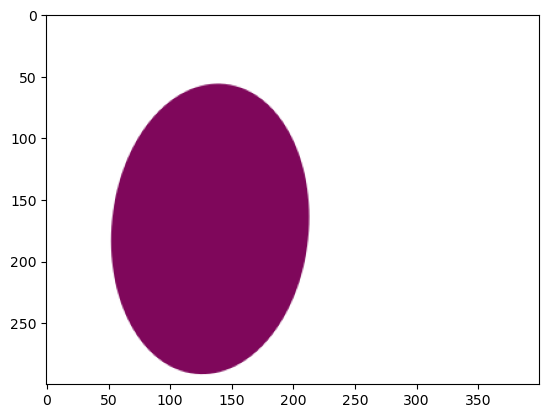

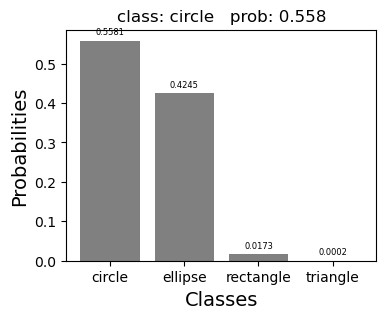

Conv2d(3, 48, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))


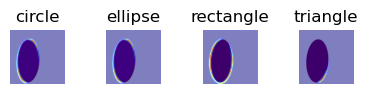

Conv2d(128, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


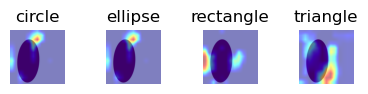

Conv2d(192, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


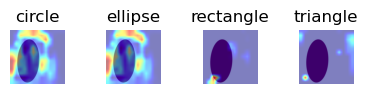

In [68]:
img_path = '/common/vanderplas/muxin/Models/data_set/shape_data2/val/ellipse/ellipse55.png'
input_tensor = img_to_tensor(img_path, data_transform,)

visualize_all(img_path, model, device, target_layers, class_dict, data_transform)

### A rectagle

class: circle       prob: 0.415
class: ellipse      prob: 0.367
class: rectangle    prob: 0.193
class: triangle     prob: 0.0247


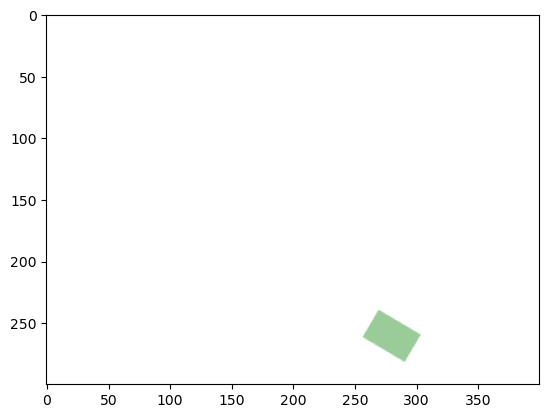

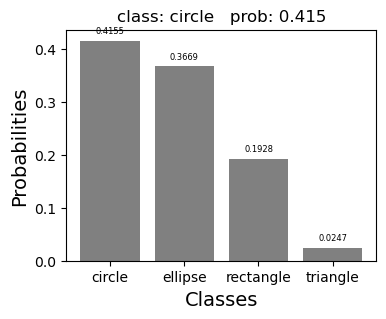

Conv2d(3, 48, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))


/common/vanderplas/muxin/38env/lib/python3.8/site-packages/torch/nn/modules/module.py:1025: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


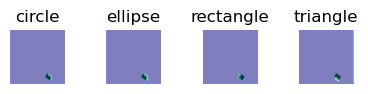

Conv2d(128, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


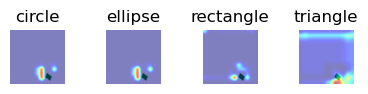

Conv2d(192, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


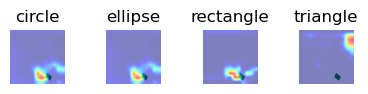

In [72]:
img_path = '/common/vanderplas/muxin/Models/data_set/shape_data2/val/rectangle/rectangle11.png'
input_tensor = img_to_tensor(img_path, data_transform,)

visualize_all(img_path, model, device, target_layers, class_dict, data_transform)

### A rectangle

class: circle       prob: 0.000519
class: ellipse      prob: 0.0304
class: rectangle    prob: 0.639
class: triangle     prob: 0.33


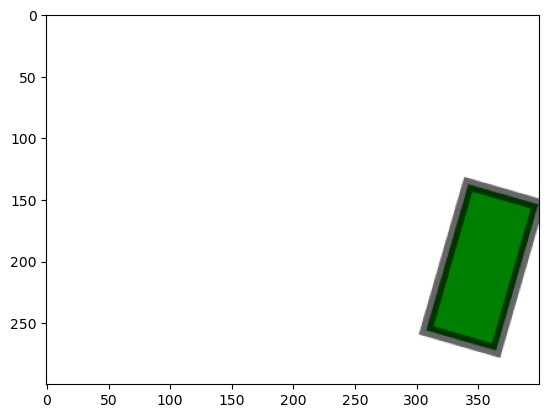

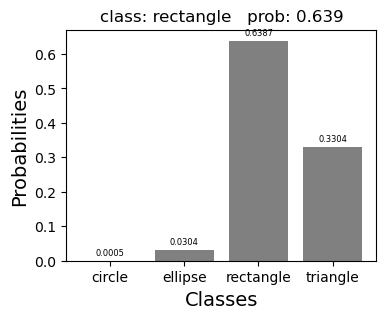

Conv2d(3, 48, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))


/common/vanderplas/muxin/38env/lib/python3.8/site-packages/torch/nn/modules/module.py:1025: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


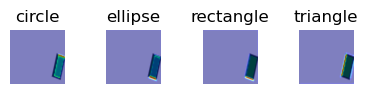

Conv2d(128, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


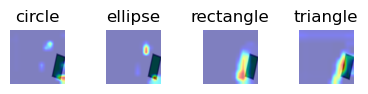

Conv2d(192, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


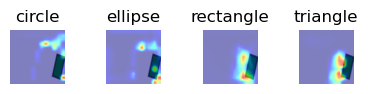

In [75]:
img_path = '/common/vanderplas/muxin/Models/data_set/shape_data2/val/rectangle/rectangle131.png'
input_tensor = img_to_tensor(img_path, data_transform,)

visualize_all(img_path, model, device, target_layers, class_dict, data_transform)

Does highlighting edge makes it easier to classify?